In [1]:
import pandas as pd
df_all = pd.read_csv('city_day.csv')
df_all.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [2]:
df_delhi = df_all.loc[df_all['City'] == 'Delhi'].copy()
df_delhi.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [3]:
df_delhi = df_delhi[['Date','AQI']]
display(df_delhi)

,Date,AQI
10229,2015-01-01,472.0
10230,2015-01-02,454.0
10231,2015-01-03,143.0
10232,2015-01-04,319.0
10233,2015-01-05,325.0
...,...,...
12233,2020-06-27,112.0
12234,2020-06-28,196.0
12235,2020-06-29,233.0
12236,2020-06-30,114.0


In [4]:
df_delhi['Date'] = pd.to_datetime(df_delhi['Date'])
df = df_delhi.set_index('Date')
df.head()

,AQI
Date,
2015-01-01,472.0
2015-01-02,454.0
2015-01-03,143.0
2015-01-04,319.0
2015-01-05,325.0


In [5]:
df.describe()

,AQI
count,1999.000000
mean,259.487744
std,119.537333
min,29.000000
25%,161.500000
50%,257.000000
75%,345.500000
max,716.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AQI     1999 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


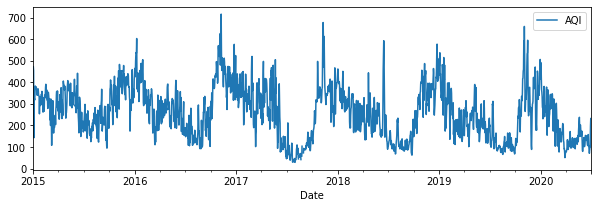

In [7]:
import matplotlib.pyplot as plt
df.plot(figsize=(10, 3))
plt.show()

In [8]:
df_month_avg = df['AQI'].resample('MS').mean()
display(df_month_avg)

Date
2015-01-01    342.290323
2015-02-01    327.928571
2015-03-01    256.064516
2015-04-01    305.266667
2015-05-01    348.580645
                 ...    
2020-03-01    135.838710
2020-04-01    113.000000
2020-05-01    148.645161
2020-06-01    125.733333
2020-07-01    101.000000
Freq: MS, Name: AQI, Length: 67, dtype: float64

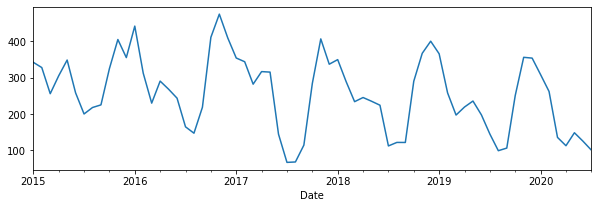

In [9]:
df_month_avg.plot(figsize=(10, 3))
plt.show()

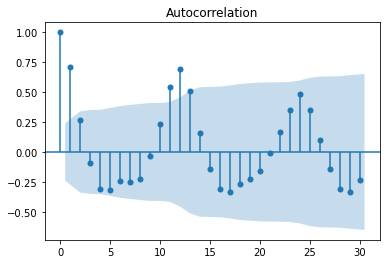

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_month_avg, lags=30)
plt.show()

C:\Users\admin\anaconda3\envs\pythonclass\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


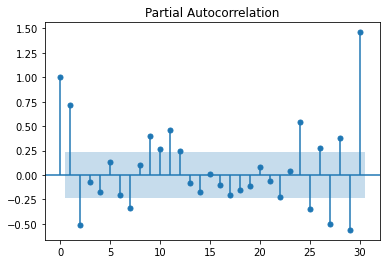

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_month_avg, lags=30)
plt.show()

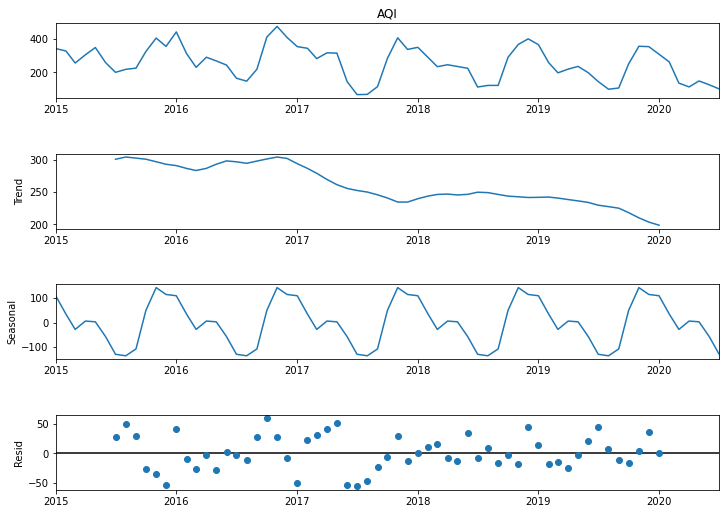

In [12]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df_month_avg, model='additive')
fig = decomposition.plot()
fig.set_size_inches(11,8)

In [13]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [14]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [15]:
adf_test(df_month_avg)

Results of Dickey-Fuller Test:
Test Statistic                  0.229024
p-value                         0.973843
#Lags Used                     11.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


In [16]:
kpss_test(df_month_avg)

Results of KPSS Test:
Test Statistic            0.650669
p-value                   0.018030
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
C:\Users\admin\anaconda3\envs\pythonclass\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


C:\Users\admin\anaconda3\envs\pythonclass\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


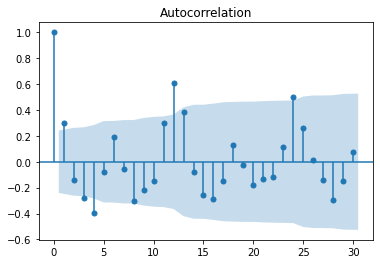

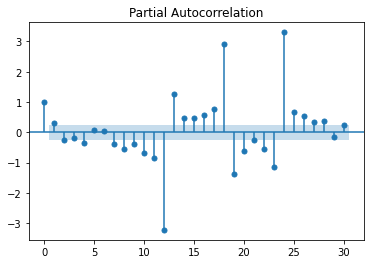

In [17]:
df_t = df_month_avg.diff(1).dropna()
plot_acf(df_t, lags=30)
plot_pacf(df_t, lags=30)
plt.show()

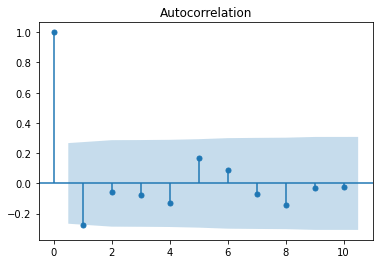

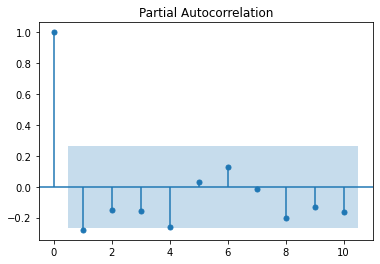

In [18]:
df_t_s = df_t.diff(12).dropna()
plot_acf(df_t_s, lags=10)
plot_pacf(df_t_s, lags=10)
plt.show()

In [19]:
import itertools
p = [0,1]
d = [1]
q = [0,1]
P = [0,1]
D = [1]
Q = [0,1]
lag = [12]
params = list(itertools.product(p, d, q, P, D, Q, lag))
print(len(params))

16


In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
df_results = pd.DataFrame()
for param in params:
    pdq = param[0:3]
    PDQL = param[3:7]
    try:
        mod = SARIMAX(df_month_avg, order=pdq, seasonal_order=PDQL)
        results = mod.fit(method = 'powell')
        data = {'param': pdq, 'param_seasonal': PDQL, 'AIC':results.aic }
        df_results = df_results.append(data, ignore_index=True)
    except:
        continue
df_results = df_results.sort_values(by='AIC',ascending=False)

Optimization terminated successfully.
         Current function value: 4.402021
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: 4.245553
         Iterations: 2
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 4.254062
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 4.239701
         Iterations: 3
         Function evaluations: 161
Optimization terminated successfully.
         Current function value: 4.347839
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: 4.231586
         Iterations: 4
         Function evaluations: 160
Optimization terminated successfully.
         Current function value: 4.247726
         Iterations: 3
         Function evaluations: 109
Optimization terminated successfully.

In [21]:
df_results

,AIC,param,param_seasonal
0,591.870762,"(0, 1, 0)","(0, 1, 0, 12)"
8,589.417883,"(1, 1, 0)","(0, 1, 0, 12)"
4,586.610478,"(0, 1, 1)","(0, 1, 0, 12)"
12,584.043392,"(1, 1, 1)","(0, 1, 0, 12)"
10,575.573751,"(1, 1, 0)","(1, 1, 0, 12)"
6,575.195309,"(0, 1, 1)","(1, 1, 0, 12)"
11,574.781642,"(1, 1, 0)","(1, 1, 1, 12)"
7,574.487877,"(0, 1, 1)","(1, 1, 1, 12)"
3,574.119900,"(0, 1, 0)","(1, 1, 1, 12)"
2,574.044363,"(0, 1, 0)","(1, 1, 0, 12)"


In [22]:
pdq = df_results.iloc[0,1]
PDQL = df_results.iloc[0,2]

mod = SARIMAX(df_month_avg, order=pdq, seasonal_order=PDQL)
results = mod.fit(method = 'powell')

Optimization terminated successfully.
         Current function value: 4.402021
         Iterations: 2
         Function evaluations: 37


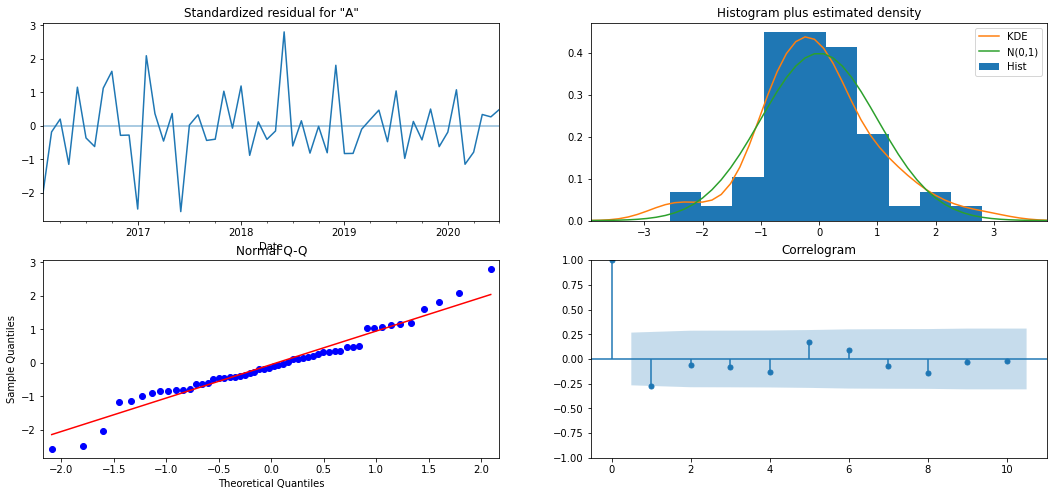

In [23]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

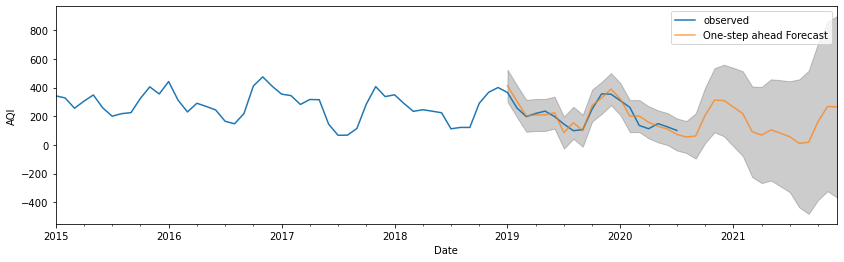

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), end=pd.to_datetime('2021-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_month_avg.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()